  # ENCH 470 Final Project

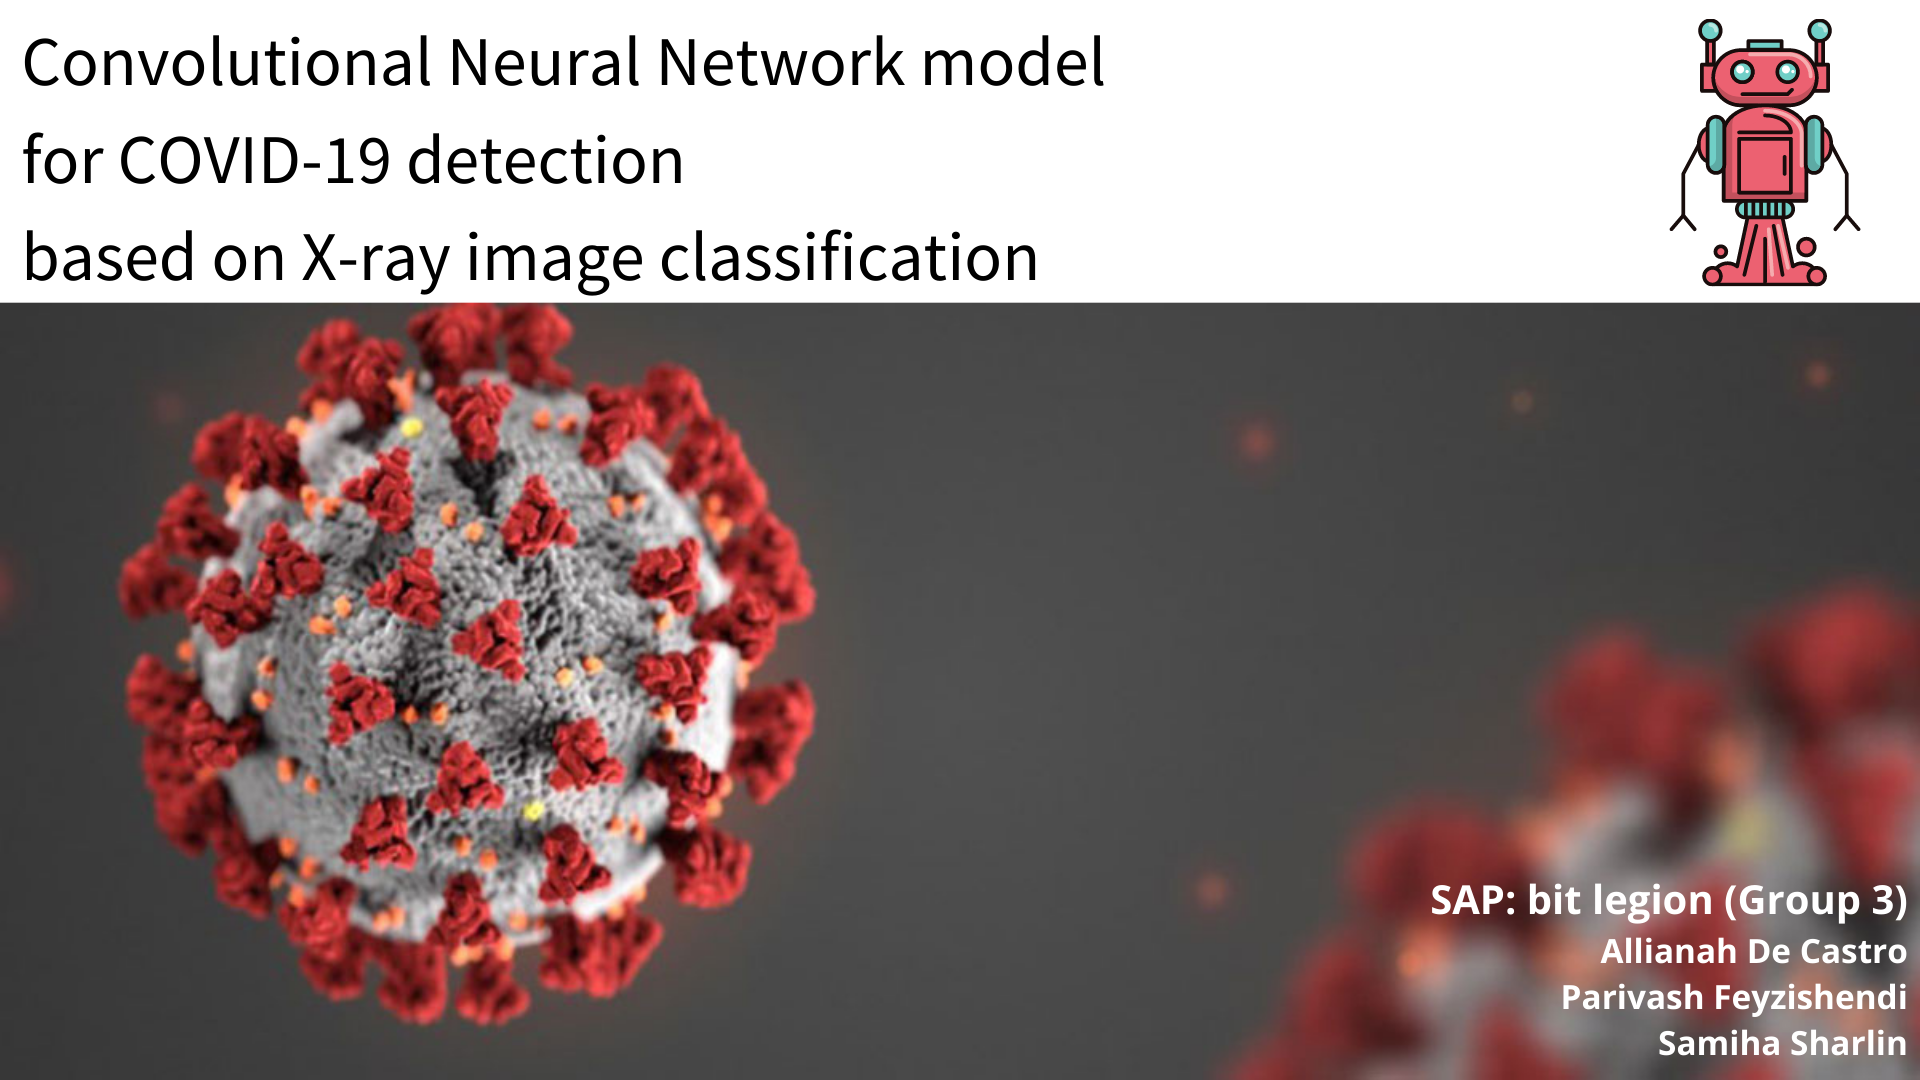

#### Problem Statement



Since the outbreak of COVID-19 in December 2019, the [Center for Systems Science and Engineering at Johns Hopkins University](https://coronavirus.jhu.edu/map.html) have recorded more than 269 million confirmed cases with over 5.3 million deaths. With increasing numbers of cases, there has been on-going [interdisciplinary research](10.1111/joim.13091) for effective methods of its quick diagnosis to help mitigate the pandemic.  Although, the reverse transcriptase-polymerase chain reaction (RT-PCR) is broadly used and many other alternatives have been proposed and developed, the testing availability and capacity still cannot meet the unparalleled demands for not only a *rapid* but also a *reliable* and *accessible* diagnostic tool.

Diagnosis through medical radiography and radiology images is possibly one of the fastest ways to detect a disease and making clinical decisions. The latest development in the application of machine learning models to [medical image recognition problems](https://doi.org/10.1016/j.media.2016.06.032) have inspired numerous [studies](https://doi.org/10.1016/j.imu.2021.100564) to apply these models, specifically [convolutional neural networks (CNNs)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53), to COVID-19 radiological (X-ray) and computed tomography (CT) images. CNN models have shown great success with image datasets and are specifically built to map image data to computer readable formats and their efficient feature extractions without reducing the quality of the model make them computationally efficient. 

[Some early studies](https://doi.org/10.1148/ryct.2020200028) have shown abnormalities in the chest X-rays of patients infected with COVID-19, and with the wide accessibility of an X-ray facility make the application of such methods promising. However, the success and translation of these machine learning models to clinical settings is largely dependent on the variability in *training data* that are often subject to methodological flaws and underlying biases. A [recent review by Roberts et al.](https://doi.org/10.1038/s42256-021-00307-0) on the use of machine learning methods for COVID-19 diagnosis and prognosis using medical imaging techniques address such problems along with recommendations on how to avoid them. 


#### Dataset Analysis

Currently there is no restriction on uploading images or evaluation done on [public COVID-19 image databases](https://doi.org/10.1016/j.media.2021.102225). There are high chances of [image duplicates](10.1111/0033-0124.00327) across the sources and [image resolution differences](10.1111/0033-0124.00327) leading lack of consistency. Another major issue is [sources that contain biases](https://doi.org/10.1038/s41467-020-19478-2) or are not the best representative - for instance, uneven age and gender distributions across the dataset. 
Use of medical image data are also subject to high privacy concerns and require regulatory restriction at each stage of data handling. Origin of the data and consent for its use and reuse is an important step in this type of [ethical data collection and management](10.1007/s11673-017-9809-6).  [Risk of bias in training data](https://doi.org/10.7326/M18-1376) is also an active area of research and the use of any such database should aim to match demographics across various cohorts. 


Due to the unavailability of a database containing peer-reviewed manuscripts with sufficient documentation for reproducible models, we have used a medium sized dataset from the open-source website [Kaggle](https://www.kaggle.com/docs) since our primary aim is to use a real-world dataset, understand and then apply a simple CNN model for detecting COVID-19. 

Kaggle is a platform for data scientists of all levels to benefit and learn from the publicly available resources and the [COVID-19 radiography database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database) is one of the top most used datasets that have covid positive x-ray images along with normal, lung opacity (non-covid lung infection), and viral pneumonia images. 

The data distribution in each category is visualized below:

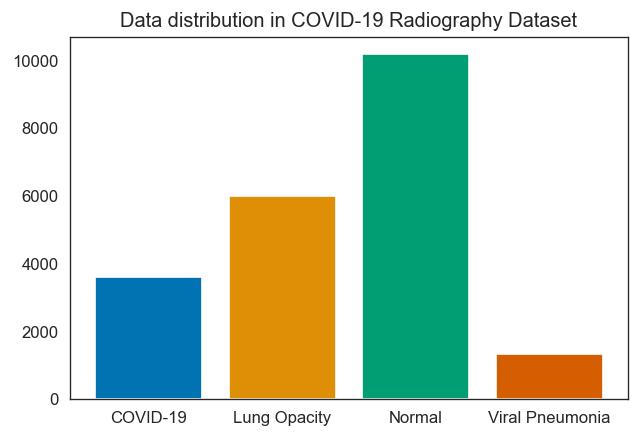

{'COVID-19': 3616, 'Lung Opacity': 6012, 'Normal': 10192, 'Viral Pneumonia': 1345}


In [112]:
#Importing relevant modules
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style("white")
plt.rcParams['figure.dpi'] = 120

#Path to main directory that contains the dataset
DIR = '/Users/ssharlin/Desktop/Fall 2021/ENCH 470/project/COVID-19_Radiography_Dataset'

#Adding path to subdirectories that have images classified in directories
SUBDIR_POS = '/COVID'
SUBDIR_NEG = '/Normal'
SUBDIR_LO = '/Lung_Opacity'
SUBDIR_VP = '/Viral Pneumonia'

#Dictionary to count images in each category
image_counter = {'COVID-19':len(os.listdir(DIR + SUBDIR_POS)),
           'Lung Opacity':len(os.listdir(DIR + SUBDIR_LO)),
           'Normal':len(os.listdir(DIR + SUBDIR_NEG)),
           'Viral Pneumonia':len(os.listdir(DIR + SUBDIR_VP))}


#Visualizing distribution of the whole dataset
palette = sns.color_palette("colorblind", len(image_counter))
plt.figure(figsize=(6,4))
plt.bar(x = image_counter.keys(), height= image_counter.values(), color = palette)
plt.title("Data distribution in COVID-19 Radiography Dataset")
plt.show()
print(image_counter)

We will be ignoring the lung opacity and viral pneumonia images, and only focus on the *normal* and *covid positive* data as it aligns with our problem statement. 

There are two major concerns with the dataset that we should take into account before we implement any model. One is the uneven distribution of data between the two classes and other is the variation in data distribution within each class. 

To overcome and analyze the effect of uneven data distribution among the two classes, we will evaluate all the images of covid-19 and normal data and compare our result on an evenly sampled data by randomly selecting equal number of images from both the classes.

For the distribution of the data within each class, we analyzed the metadeta files for each class and found that COVID-19 data is accumulated mainly from three sources - [BIMCV-COVID19+ dataset](https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711), [open-source Github repositories](https://github.com/armiro/COVID-CXNet) and [open-source datasets from pre-prints](https://arxiv.org/abs/2006.11988). <br> The bulk portion of the normal dataset is from the [RSNA Pneumonia Detection Challenge by Radiological Society of North America](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview) combined with [open-source Kaggle datasets](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). Furhter inspection within each source of the data can reveal of any underlying biases which is outside the scope of this project. 

The data distribution within each class is visualized below taking information from the [metadata files](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database):

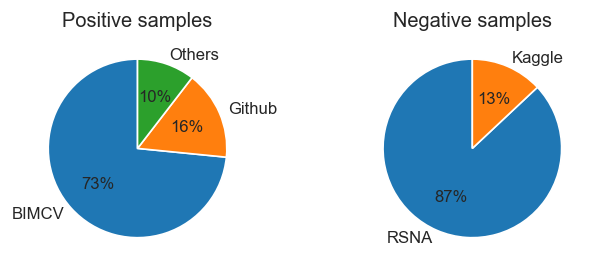

Total positive samples: 3616
Total pegative samples: 10192


In [113]:
import numpy as np
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6,6))

labels_covid = ['BIMCV', 'Github', 'Others']
fracs_covid = np.array([(2656/3617), (583/3617), (378/3617)])
ax1.pie(fracs_covid, labels = labels_covid, startangle = 90, autopct='%1.0f%%')
ax1.set_title('Positive samples', fontsize=12)

labels_normal = ['RSNA', 'Kaggle']
fracs_normal = np.array([87, 13])
ax2.pie(fracs_normal, labels = labels_normal, startangle = 90, autopct='%1.0f%%')
ax2.set_title('Negative samples',fontsize=12)

plt.subplots_adjust(wspace=0.5)
plt.show()

print(f'Total positive samples: {len(os.listdir(DIR + SUBDIR_POS))}')
print(f'Total pegative samples: {len(os.listdir(DIR + SUBDIR_NEG))}')

The images are selected at random from the two directories using the following fucntion and viewed to inspect if there is any major discrepancy between the samples.

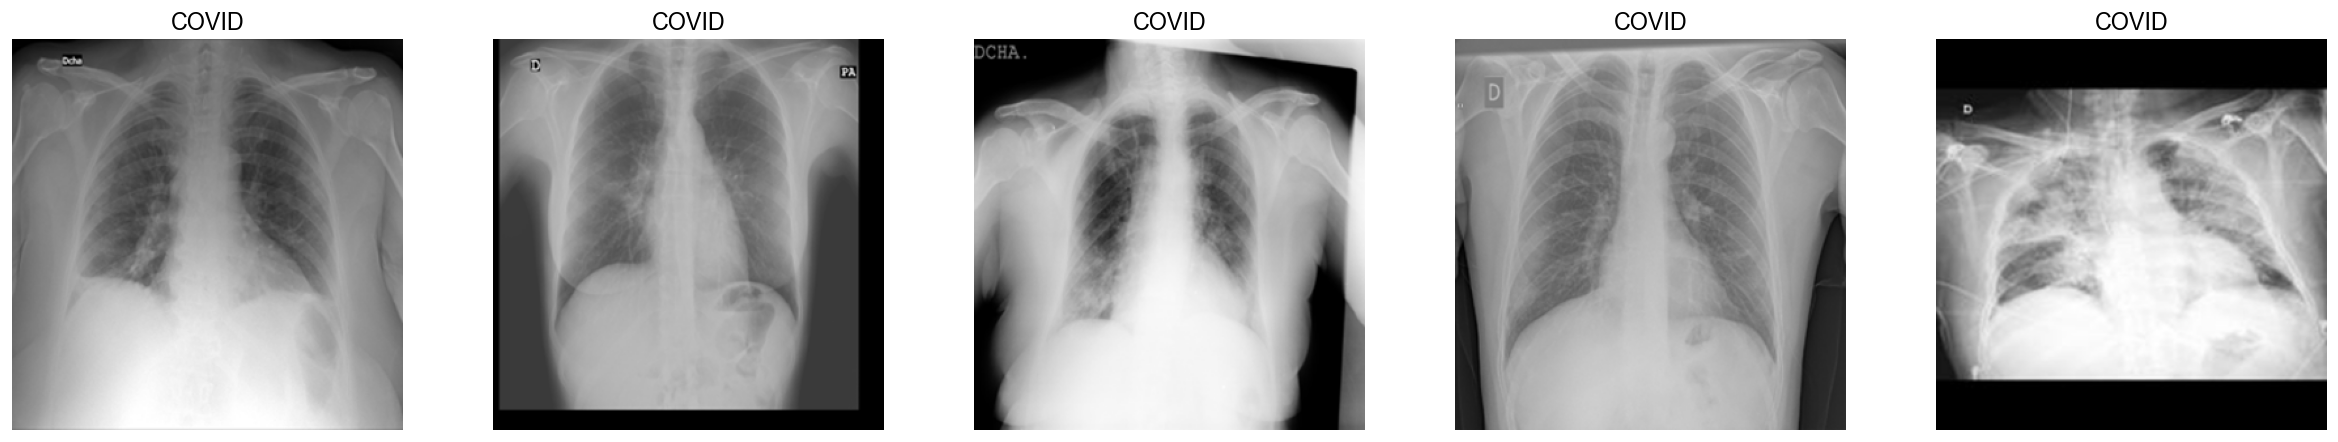

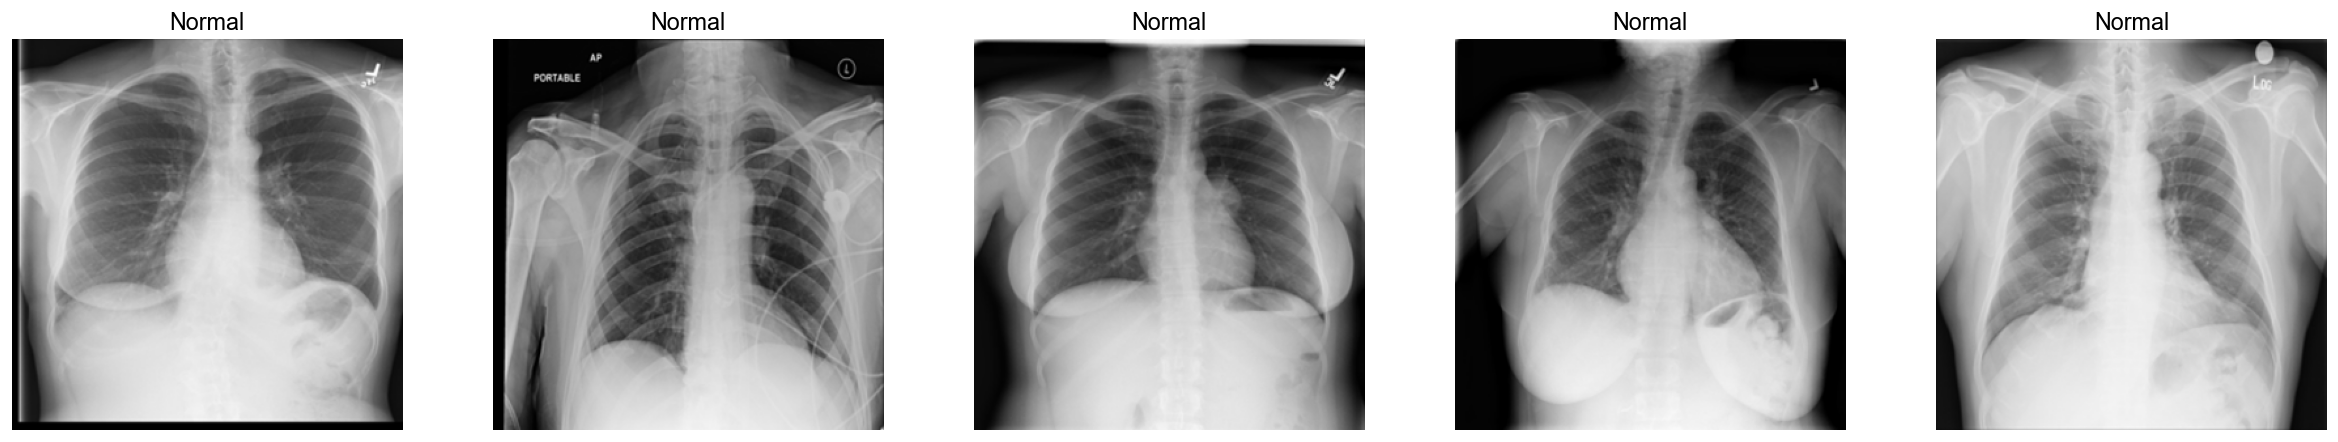

In [126]:
#Image display function is imported that takes the path to images as argument
from data_vis import data_visualization

data_visualization(DIR+SUBDIR_POS) #positive samples
data_visualization(DIR+SUBDIR_NEG) #negative samples

The hyperparameters for our model are defined below - we will be processing data in chunks of 64 images and reshape the images into 248 by 248 pixels. Since the input images have different shapes, this ensures consistency across the samples. We will use [Adam optimizer](https://towardsdatascience.com/adam-optimization-algorithm-1cdc9b12724a) (an extension to stochastic gradient decent) with a learning rate of 0.001 and limit the number of epochs to 50 for time-constraint. The early stop is also added that ensures to stop training if there is a decrement observed in accuracy values and avoids overfitting of data.

In [127]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

#Hyperparameters are defined here
EPOCHS = 50 #number of iterations
BATCH_SIZE = 64 #number of training batches

#Opti
OPTIMIZER = tensorflow.keras.optimizers.Adam(learning_rate=0.001, decay=0.001 / EPOCHS)

#All input images are sized equally for consitency
img_height, img_width = 248, 248

#Early stop to avoid over fitting by monitoring accuracy across epochs
es = EarlyStopping(monitor='val_accuracy', mode='max',
                   verbose=1, patience=10, restore_best_weights=True)

### CNN Model
The *data generator* and *model builder* both uses [Keras](https://keras.io/api/) built-in methods that provides the option of adding parameters. Customized functions are generated for our use with the option of adding the hyperparameters as an argument to each. Both the data generator and model architecture takes in the image input dimensions as argument. Data generator also needs the path to dataset directory as an input while the model requires the optimizer parameters that have been defined previously. 

In [168]:
#Importing customized functions for the model
from keras_func import img_data_generator, CNN_model

In [5]:
#dataset path to be used as input to data generator
dataset_path = '/Users/ssharlin/Desktop/Fall 2021/ENCH 470/project/xray-dataset'
train_One, test_One = img_data_generator(dataset_path, img_height, img_width)

#model function takes in optimizer and image dimensions
model_One = CNN_model(img_height, img_width, OPTIMIZER)
model_One.summary() #prints the model architecture  

#Model training, output is stored as history file with the algortithm details 
history_One = model_One.fit(
        train_One,
        steps_per_epoch = train_One.samples // BATCH_SIZE,
        validation_data = test_One, 
        validation_steps = test_One.samples // BATCH_SIZE,
        epochs = EPOCHS,
        verbose = 0, 
        callbacks=[es])

Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.
Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_______

2021-12-13 00:00:44.592723: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-13 00:00:44.592827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-13 00:00:44.902274: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-13 00:00:44.902644: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-13 00:00:45.148444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:01:30.321481: I tensorflow/core/grappler/

Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping


The model architecure is shown visually here, constructed using [Net2Vis](https://github.com/viscom-ulm/Net2Vis).
We see that the model ran till 50 epochs, more runs would have probably improved results further.






We used three convolutional layers, each followed by max-pooling, with dense layers after them for generating the feed-forward layers for classification. As it is a binary classification problem, we will use sigmoid as the activation function for the output that squeezes the output between 0 to 1.

The model evaluation metrics are printed below along with the visualizations.

In [208]:
#Importing customized functions for the model evaluation
from keras_func import model_metrics, confusion_matrix
from model_visuals import plot_acc_loss, plot_rec_prec

The model performance metrics are as follows:
44/44 [==============================] - 9s 197ms/step - loss: 0.0818 - accuracy: 0.9768 - precision: 0.9815 - recall: 0.9872
Test set loss: 0.0818 and accuracy: 97.68%


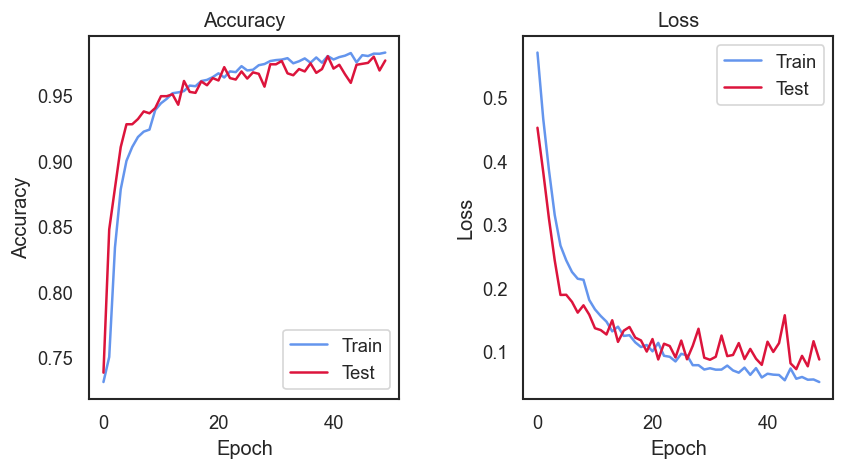

In [209]:
#The model evaluation matrices are printed for the first CNN model
model_metrics(model_One, test_One, history_One)


#Visualizing results:
plot_acc_loss(history_One)

An accuracy of 97.68% looks promising for the first tested model, however since the model is aimed for disease diagnostic tool, we need to consider other model evaluation metrics to make an appropriate conclusion.

An imbalanced classification problem occurs commonly in disease detection when the rate of the disease in the public is low compared to population. The positive class is greatly outnumbered by the negative class. This is an example of a fairly common case in data science when accuracy is not a good measure for assessing model performance.

Intuitively, we know that proclaiming all data points as negative in the covid detection is not that helpful and we should focus on identifying the positive cases to avoid spread. Then the metric we should maximize is - recall - which is the number of true positives divided by the number of true positives plus the number of false negatives. 

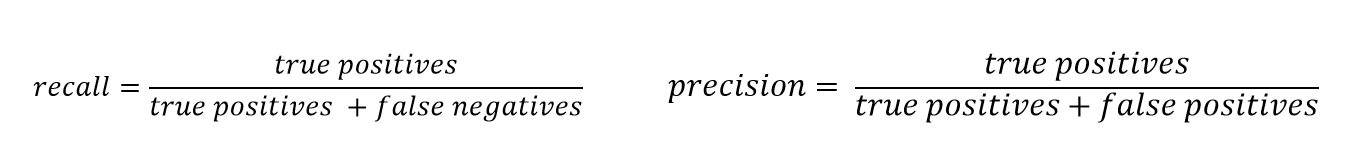

True positives are the data point classified as positive by the model that are actually positive and false negatives are data points that the model identifies as negative but are actually are positive. In our case, true positives are correctly identified as covid positive, and false negatives would be individuals the model labels as not covid positive but are actually positives.


So for our model, let's visualize the precision and recall plots along with the confusion matrix.

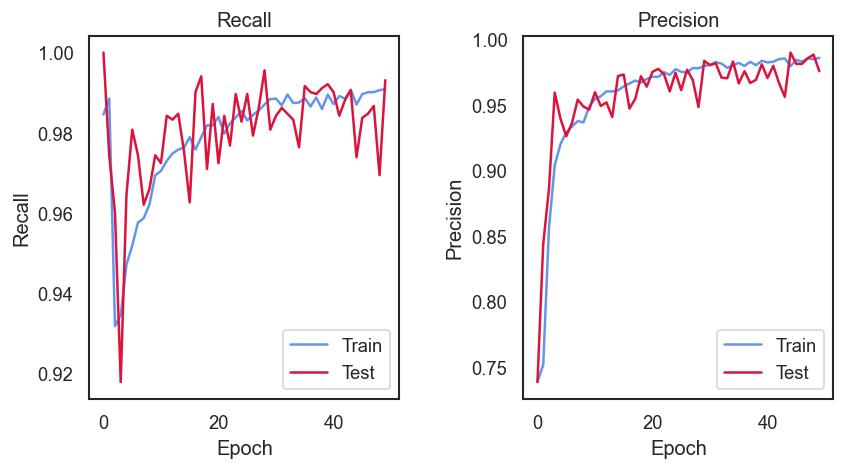

F1 score: 0.7420219244823386


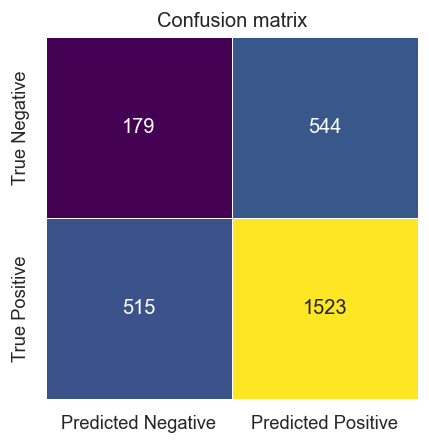

In [206]:
plot_rec_prec(history_One)
confusion_matrix(model_One, test_One)

515 cases would be predicted as negative when they are truly covid positive, which is a very number given the number of samples in the model.

### CNN Model with a small evenly distributed dataset

We have evaluated the same model with an even data distribution, containing **3616 number of positive and negative samples**. Below the same codes are executed with dataset path chosen different for the equal sample size file locations.

In [7]:
#Equally distributed dataset to be used as input to data generator
equal_dataset_path = '/Users/ssharlin/Desktop/Fall 2021/ENCH 470/project/xray-dataset-equal'
train_Two, test_Two = img_data_generator(equal_dataset_path, img_height, img_width)

#model function takes in optimizer and image dimensions
model_Two = CNN_model(img_height, img_width, OPTIMIZER)
model_Two.summary()

#Model training, output is stored as history file with the algortithm details 
history_Two = model_Two.fit(
        train_Two,
        steps_per_epoch = train_Two.samples // BATCH_SIZE,
        validation_data = test_Two, 
        validation_steps = test_Two.samples // BATCH_SIZE,
        epochs = EPOCHS,
        verbose = 0, 
        callbacks=[es])

Found 5786 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 248, 16)      32        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 64)        0         
____________________________________

2021-12-13 00:48:48.596744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:49:12.653560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping


We can observe that the model ran till 12 epochs, upon inspecting the model metrics we observe very large differences.

The model performance metrics are as follows:
23/23 [==============================] - 4s 190ms/step - loss: 0.6931 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00
Test set loss: 0.6931 and accuracy: 50.00%


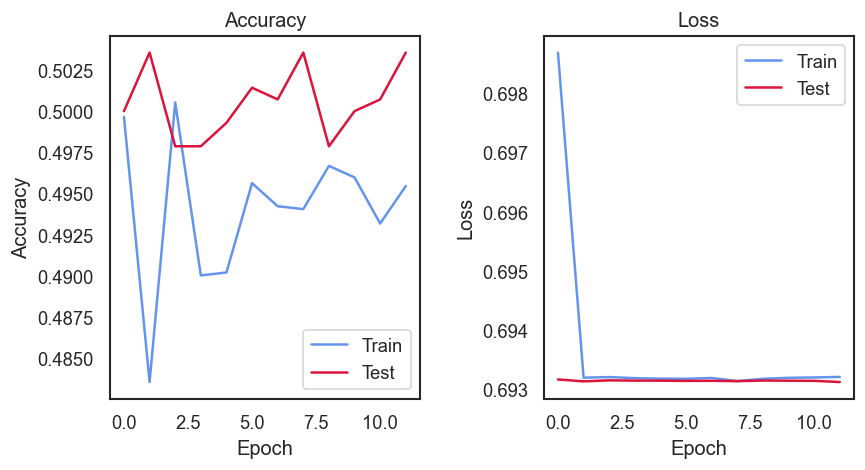

In [210]:
#The model evaluation matrices are printed for the first CNN model
model_metrics(model_Two, test_Two, history_Two)

#Visualizing results:
plot_acc_loss(history_Two)

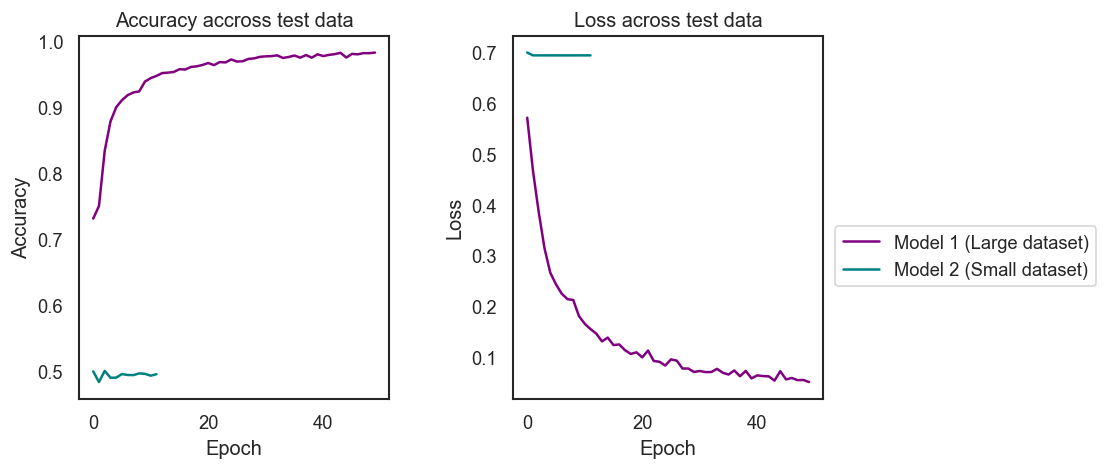

In [185]:
#Comparision with the first model

fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.set_style("white")
ax[0].set_title('Accuracy accross test data')
ax[0].plot(history_One.history['accuracy'], color = 'Purple')
ax[0].plot(history_Two.history['accuracy'], color = 'Teal')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')


ax[1].set_title('Loss across test data')
ax[1].plot(history_One.history['loss'], color = 'Purple')
ax[1].plot(history_Two.history['loss'], color = 'Teal')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Model 1 (Large dataset)', 'Model 2 (Small dataset)'],bbox_to_anchor=(1.01, 0.5))

plt.subplots_adjust(wspace=0.4)
plt.show()

The accuracy for **Model 1** with 13808 samples is 97.68% and that for **Model 2** with 7232 samples is 50%.

We can observe that reducing the sample size to half also reduces the accuracy by two.

We implemented the large dataset on a simpler CNN model to observe the dependance of accuracy on model complexity.
Below the function for the basic model is imported and the code executed.

In [201]:
from keras_func import CNN_model_basic

In [9]:
dataset_path = '/Users/ssharlin/Desktop/Fall 2021/ENCH 470/project/xray-dataset'
train_One_basic, test_One_basic = img_data_generator(dataset_path, img_height, img_width)

model_One_basic = CNN_model_basic(img_height, img_width,OPTIMIZER)
model_One_basic.summary()


history_One_basic = model_One_basic.fit(
        train_One_basic,
        steps_per_epoch = train_One_basic.samples // BATCH_SIZE,
        validation_data = test_One_basic, 
        validation_steps = test_One_basic.samples // BATCH_SIZE,
        epochs = EPOCHS,
        verbose = 0, 
        callbacks=[es])

Found 11047 images belonging to 2 classes.
Found 2761 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 248, 248, 16)      32        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 64)      25664     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               31490176  
___________________________________

2021-12-13 00:55:49.601710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 00:57:37.976236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


The new CNN model is visualized as follows:






The accuracy for this model is 89.06%, and the true positive cases that are predicted negative is still high, 481!

The model performance metrics are as follows:
44/44 [==============================] - 16s 366ms/step - loss: 0.2760 - accuracy: 0.8906 - precision: 0.9114 - recall: 0.9436
Test set loss: 0.2760 and accuracy: 89.06%


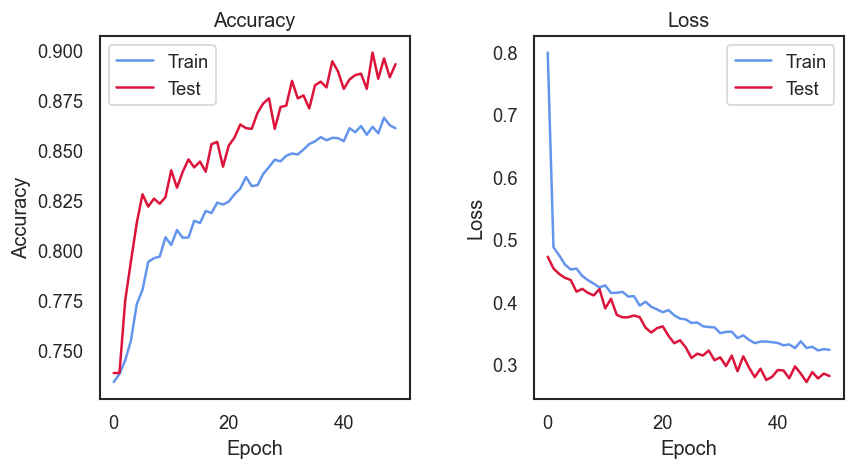

F1 score: 0.7519922723979715


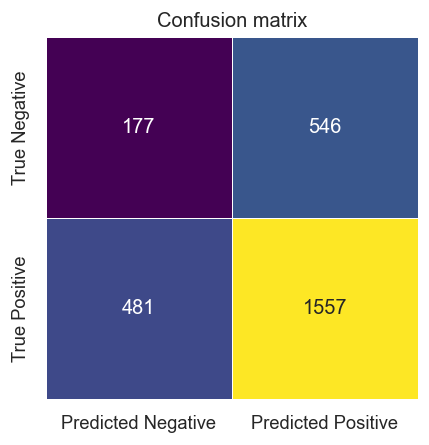

In [211]:
#The model evaluation matrices are printed for the first CNN model
model_metrics(model_One_basic, test_One_basic, history_One_basic)

#Visualizing results:
plot_acc_loss(history_One_basic)
confusion_matrix(model_One_basic, test_One_basic)

Finally the accuracy of the three evaluationsa are compared in the plot below:

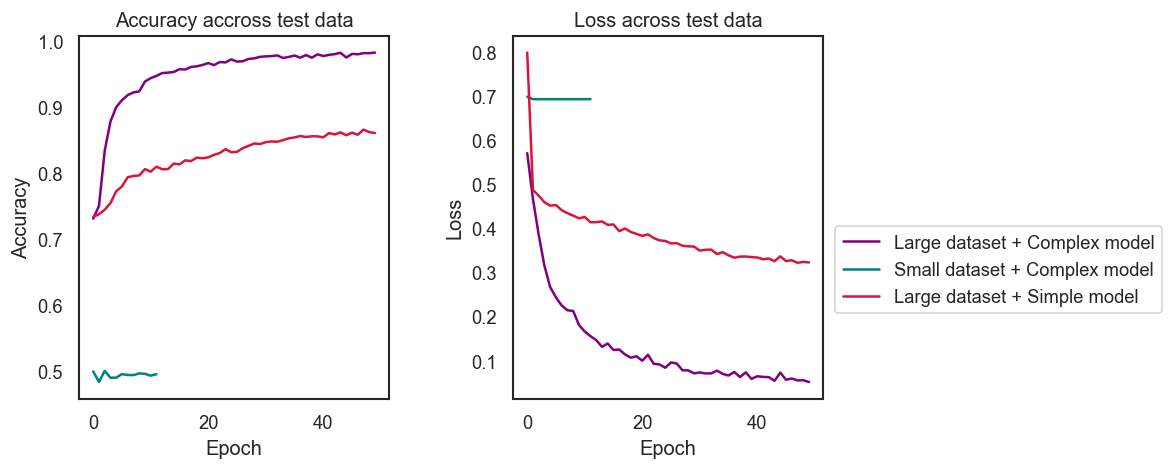

In [214]:
#Comparision with the first model

fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.set_style("white")
ax[0].set_title('Accuracy accross test data')
ax[0].plot(history_One.history['accuracy'], color = 'Purple')
ax[0].plot(history_Two.history['accuracy'], color = 'Teal')
ax[0].plot(history_One_basic.history['accuracy'], color = 'crimson')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')


ax[1].set_title('Loss across test data')
ax[1].plot(history_One.history['loss'], color = 'Purple')
ax[1].plot(history_Two.history['loss'], color = 'Teal')
ax[1].plot(history_One_basic.history['loss'], color = 'crimson')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Large dataset + Complex model', 'Small dataset + Complex model', 'Large dataset + Simple model'],
             bbox_to_anchor=(1.01, 0.5))

plt.subplots_adjust(wspace=0.4)
plt.show()

#### Conclusion


